# vaccination comparison (UK vs Kenya)

In [1]:
import plotly.graph_objects as go
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline

In [2]:
#Read data
covid_cases = pd.read_csv('worldometer.csv', \
                          dtype={'cumulative_total_cases':'float','daily_new_cases': 'float'})
                         
covid_vaxxs = pd.read_csv('COUNTRY VACC.csv')

In [3]:
#use the same name of the country throughout 
def fix_country_name(country):
    name_dict = {
        'KEN': 'Kenya',
        'UK': 'United Kingdom'
     }
    try:
      return name_dict[country]
    except KeyError:
      return country

covid_cases.country = covid_cases.country.apply(fix_country_name)

In [4]:
# UK & Kenya 
countries_of_interest = ["United Kingdom","Kenya"]

covid_cases_subset = covid_cases[covid_cases.country.isin (countries_of_interest)]
covid_vaxxs_subset = covid_vaxxs[covid_vaxxs.country.isin (countries_of_interest)]

In [12]:
#Merge the above files and tidy
merged_data = pd.merge_ordered(covid_cases_subset, covid_vaxxs_subset, \
                               left_on=['country', 'country'], \
                               right_on=['country', 'country'])

merged_data.drop(columns=['iso_code', 'source_name', 'source_website', 'vaccines',\
                           'daily_vaccinations_per_million', 'daily_vaccinations_raw'], inplace=True)

In [18]:
# Remove NANS 
merged_data.fillna({'total_vaccinations':0, 'people_vaccinated':0, 'people_fully_vaccinated':0,\
                 'daily_vaccinations':0,'total_vaccinations_per_hundred':0,\
                 'people_vaccinated_per_hundred':0 ,'people_fully_vaccinated_per_hundred':0}\
                 ,inplace=True)

covid_data = merged_data.dropna(how='any', subset=['people_fully_vaccinated_per_hundred'])

In [19]:
#Put an index to date
covid_data.set_index('date', inplace=True)
covid_data.index = pd.to_datetime(covid_data.index, errors='coerce', infer_datetime_format=True)

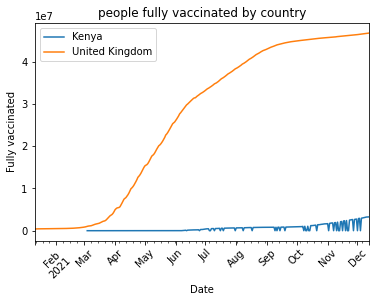

In [46]:
#line graph
covid_data.groupby('country').people_fully_vaccinated.plot(legend=True,rot=45)

plt.ylabel('Fully vaccinated')
plt.xlabel('Date')
plt.title('people fully vaccinated by country');

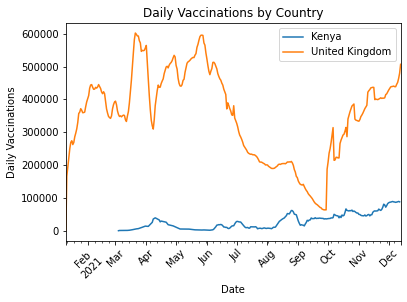

In [44]:
#line graph 
covid_data.groupby('country').daily_vaccinations.plot(legend=True,rot=45)

plt.ylabel('Daily Vaccinations')
plt.xlabel('Date')
plt.title('Daily Vaccinations by Country');